In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sns.set_style('whitegrid')

In [4]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [5]:
print(train_df.shape)
print(test_df.shape)

(26729, 10)
(11456, 8)


In [6]:
train_df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [7]:
train_df.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A667432,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [8]:
train_df.isnull().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [9]:
test_df.isnull().sum()

ID                   0
Name              3225
DateTime             0
AnimalType           0
SexuponOutcome       0
AgeuponOutcome       6
Breed                0
Color                0
dtype: int64

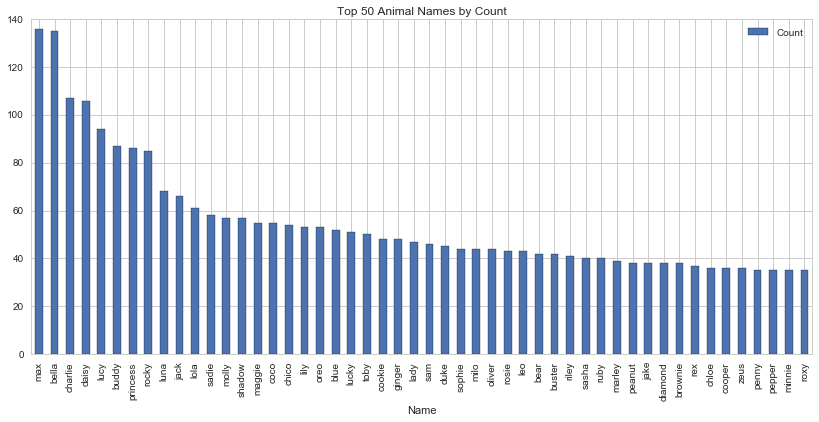

In [11]:
from collections import Counter
top_names = pd.DataFrame(sorted(Counter(train_df.Name.str.lower().str.strip()).items(), 
                                key=lambda x: x[1], reverse=True)[1:51], columns=['Name', 'Count'])
top_names.plot(kind='bar', x='Name', y='Count', figsize=(14, 6), title='Top 50 Animal Names by Count')

In [12]:
datetime_df = train_df.DateTime.astype(str).str.replace(' .*', '').str.split("-", expand=True)
datetime_df.columns = ['Year', 'Month', 'Day']

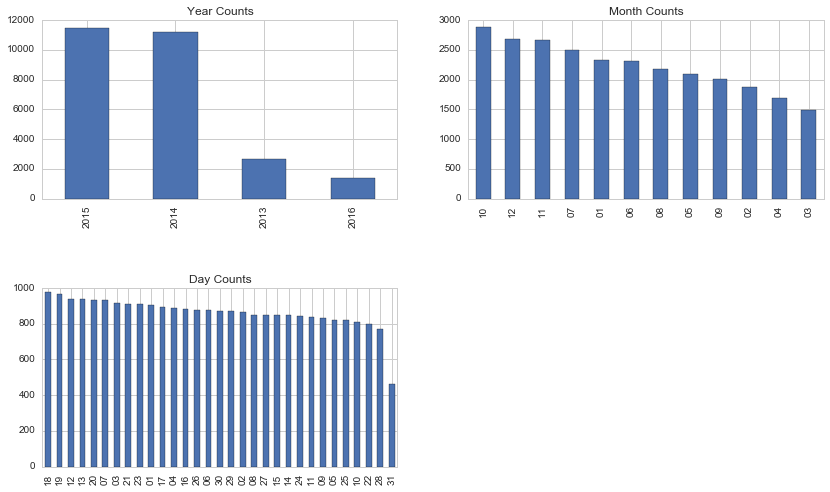

In [13]:
f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False)
datetime_df.Year.value_counts().plot(kind='bar', ax=ax1, figsize=(14, 8), title='Year Counts')
datetime_df.Month.value_counts().plot(kind='bar', ax=ax2, figsize=(14, 8), title='Month Counts')
datetime_df.Day.value_counts().plot(kind='bar', ax=ax3, figsize=(14, 8), title='Day Counts')
ax4.set_visible(False)
f.subplots_adjust(hspace=.5)

In [21]:
train_df.AgeuponOutcome.str.extract('([A-Za-z]+)', expand=False).value_counts()

years     10874
months     8339
year       3969
weeks      1704
month      1281
days        332
week        146
day          66
Name: AgeuponOutcome, dtype: int64

In [45]:
import re
def convert_age(row):
    to_years = int(re.search('\d+', str(row)).group()) if re.search('\d+', str(row)) else None
    if 'year' in str(row):
        return to_years
    elif 'month' in str(row) or 'months' in str(row):
        return round(to_years / 12, 2)
    elif 'day' in str(row) or 'days' in str(row):
        return round(to_years / 365, 2)
    elif 'week' in str(row) or 'weeks' in str(row):
        return round(to_years / 52, 2)

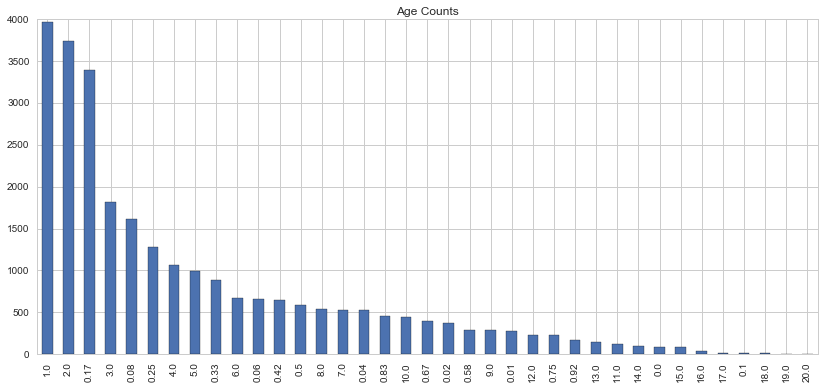

In [47]:
age_to_years = train_df.AgeuponOutcome.apply(convert_age)
age_to_years.value_counts().plot(kind='bar', figsize=(14, 6), title='Age Counts')

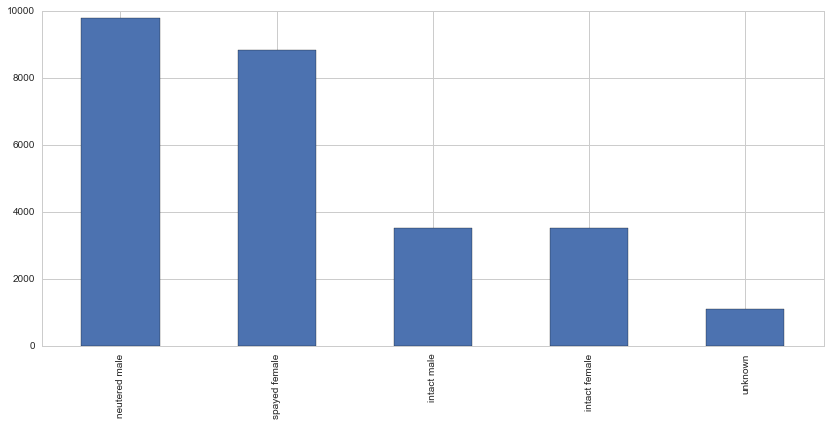

In [48]:
train_df.SexuponOutcome.str.lower().str.strip().value_counts().plot(kind='bar', figsize=(14, 6))

In [59]:
breed_word_count = sorted(Counter([x for word_list in train_df.Breed.str.lower().str.strip().str.split(expand=False) 
                            for x in word_list]).items(), key=lambda x: x[1], reverse=True)[:50]

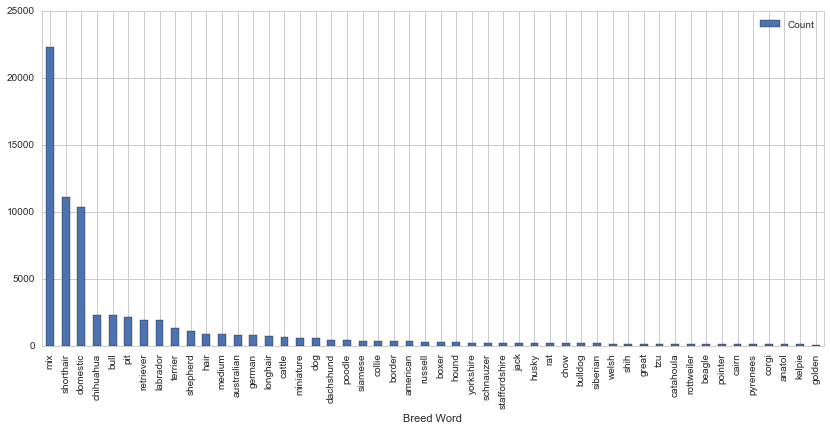

In [62]:
pd.DataFrame(breed_word_count, columns=['Breed Word', 'Count']).plot(kind='bar', x='Breed Word', y='Count', figsize=(14, 6))